In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
import pickle
from skimage import measure

In [2]:
with open("asgrown.txt", "rb") as fp:   # Unpickling
    asgrown= pickle.load(fp)

len(asgrown)

22

In [3]:
with open("doped.txt", "rb") as fp:   # Unpickling
    doped= pickle.load(fp)

len(doped)

22

In [4]:
dist_ag = np.load('C:/Users/Josh_/distance_ag.npy')

In [5]:
dist_doped = np.load("C:/Users/Josh_/dist_arr_doped.npy")

In [6]:
dist_ag.shape

(200, 237)

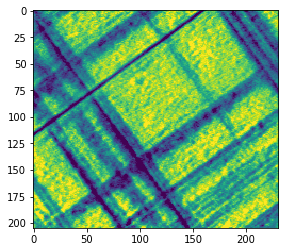

In [7]:
pre = np.load('C:/Users/Josh_/prepull.npy')
plt.imshow(pre)
plt.show()

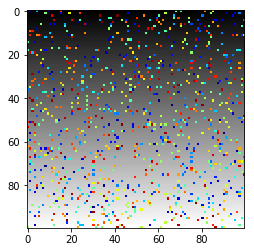

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Generate some data...
gray_data = np.arange(10000).reshape(100, 100)

masked_data = np.random.random((100,100))
masked_data = np.ma.masked_where(masked_data < 0.9, masked_data)

# Overlay the two images
fig, ax = plt.subplots()
ax.imshow(gray_data, cmap=cm.gray)
ax.imshow(masked_data, cmap=cm.jet, interpolation='none')
plt.show()

In [9]:
g_d_image = [np.zeros((205,231),dtype=float)]*len(doped)
for i, image in enumerate(doped):
    inner = []
    for region in image:
        rows = region.bbox[0],region.bbox[2]
        cols = region.bbox[1],region.bbox[3]
        mask = np.zeros((205,231),dtype=int)
        im = region.image
        mask[rows[0]:rows[1],cols[0]:cols[1]] = im
        inner_mask = np.zeros((205,231),dtype=float)
        for row in range(mask.shape[0]):
            for col in range(mask.shape[1]):
                if mask[row,col]>0:
                    inner_mask[row,col] = mask[row,col]*(i+2)
        inner.append(inner_mask)
    g_d_image[i] = sum(inner)

In [10]:
contour = sum(g_d_image)


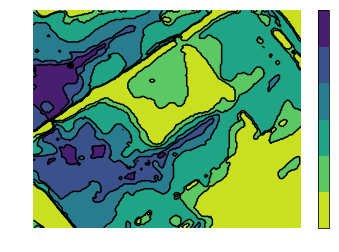

In [45]:

fig = plt.figure(frameon=False)
plt.contour(np.flipud(contour), 5,colors ='black', linestyles='-')
cs = plt.contourf(np.flipud(contour),5,cmap='viridis_r')

# create a legend for the contour set
plt.colorbar(ticks =[])
plt.axis('off')
#plt.savefig('D:/switching study/growth_figs/doped/contour_r', format='eps',dpi = 800)
plt.show()

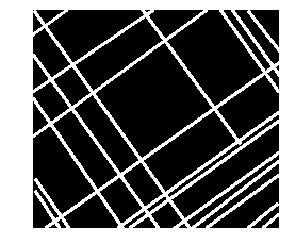

In [49]:
plt.imshow(dist_doped==0,cmap='gray')
plt.axis('off')
plt.savefig('D:/switching study/growth_figs/doped/FE_domains', format='eps',dpi = 800)
plt.show()

In [18]:
g_ag_image = [np.zeros((200,237),dtype=float)]*(len(asgrown)-7)
for i, image in enumerate(asgrown[:15]):
    inner = []
    for region in image:
        rows = region.bbox[0],region.bbox[2]
        cols = region.bbox[1],region.bbox[3]
        mask = np.zeros((200,237),dtype=int)
        im = region.image
        mask[rows[0]:rows[1],cols[0]:cols[1]] = im
        inner_mask = np.zeros((200,237),dtype=float)
        for row in range(mask.shape[0]):
            for col in range(mask.shape[1]):
                if mask[row,col]>0:
                    inner_mask[row,col] = mask[row,col]
        inner.append(inner_mask)
    g_ag_image[i] = sum(inner)

In [19]:
contour_ag = sum(g_ag_image)
np.max(contour_ag)


15.0

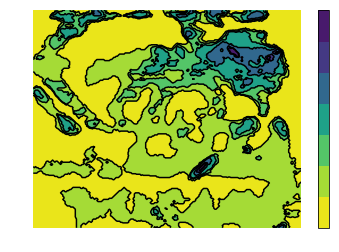

In [20]:
fig = plt.figure(frameon=True)
plt.contour(np.flipud(contour_ag), 7,levels = [0,1,3,5,8,12,13,15],colors ='black', linestyles='-')
cs = plt.contourf(np.flipud(contour_ag),7, levels = [0,1,3,5,8,12,13,15], cmap='viridis_r')

# create a legend for the contour set
plt.colorbar(ticks =[])
plt.axis('off')
plt.savefig('D:/switching study/growth_figs/asgrown/contour', format='eps',dpi = 800)
plt.show()

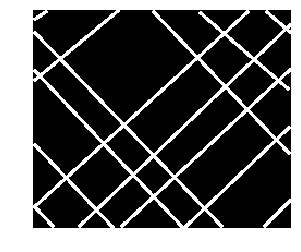

In [50]:
plt.imshow(dist_ag==0,cmap='gray')
plt.axis('off')
plt.savefig('D:/switching study/growth_figs/asgrown/FE_domains', format='eps',dpi = 800)
plt.show()

In [21]:

dist_d_image =[np.zeros((205,231),dtype=float)]*len(doped)
for i,image in enumerate(doped):
    inner = []
    for region in image:
        rows = region.bbox[0],region.bbox[2]
        cols = region.bbox[1],region.bbox[3]
        mask = np.zeros((205,231),dtype=bool)
        im = region.image
        mask[rows[0]:rows[1],cols[0]:cols[1]] = im
        dist_mask = np.zeros((205,231),dtype=float)
        for row in range(mask.shape[0]):
            for col in range(mask.shape[1]):
                if mask[row,col]>0:
                    dist_mask[row,col] = 5+dist_doped[row,col]
        inner.append(dist_mask)
    dist_d_image[i] = sum(inner)

In [22]:

dist_ag_image =[np.zeros((200,237),dtype=float)]*len(asgrown)
for i,image in enumerate(asgrown):
    inner = []
    for region in image:
        rows = region.bbox[0],region.bbox[2]
        cols = region.bbox[1],region.bbox[3]
        mask = np.zeros((200,237),dtype=bool)
        im = region.image
        mask[rows[0]:rows[1],cols[0]:cols[1]] = im
        dist_mask = np.zeros((200,237),dtype=float)
        for row in range(mask.shape[0]):
            for col in range(mask.shape[1]):
                if mask[row,col]>0:
                    dist_mask[row,col] = 5+dist_ag[row,col]
        inner.append(dist_mask)
    dist_ag_image[i] = sum(inner)

In [391]:
for i,image in enumerate(dist_ag_image):
    plt.imshow(image)
    plt.savefig('D:/switching study/growth_figs/asgrown/dist'+'2'+str(i), format='png',dpi = 300)

In [32]:
cmap = plt.get_cmap('inferno')
map_ = cmap(np.linspace(0,1,22))

for n, value in enumerate(ag_distance_nm):
    for number in value:
        plt.scatter(n,number,c=map_[n])
plt.title("As Grown Nucleation Distance From a Domains")
plt.xlabel('Normalized Voltage')
plt.ylabel('Distance(nm)')
plt.savefig("D:/switching study/nucleation figures/dist_ag" , format="eps", dpi=400)
plt.show()

In [327]:
area = [None]*len(doped)
for i,image in enumerate(doped):
    inner_area = []
    for regions in image:
        inner_area.append(regions.area)
    area[i] = inner_area

In [328]:
area_ag = [None]*len(asgrown)
for i,image in enumerate(asgrown):
    inner_area = []
    for regions in image:
        inner_area.append(regions.area)
    area_ag[i] = inner_area

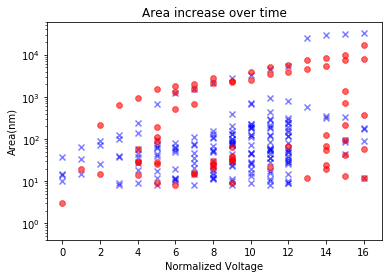

In [411]:
cmap = plt.get_cmap('inferno')
map_ = cmap(np.linspace(0,1,22))

fig = plt.figure()
ax1 = fig.add_subplot(111)
for i, (ag, d_) in enumerate(zip(area_ag[:17],area[:17])):
    for number in ag:
        ax1.scatter(i,number,marker='x',c='b', alpha = 0.5, label="As Grown" +str(i))
    for number in d_:
        ax1.scatter(i,number,marker='8',c = 'r',alpha = 0.6,label = "Bombarded"+str(i))
ax1.set_yscale('log')
plt.title("Area increase over time")
plt.xlabel('Normalized Voltage')
plt.ylabel('Area(nm)')
#plt.legend(("As Grown",90, "Bombarded"), loc='upper left')

#plt.savefig("D:/switching study/nucleation figures/dist_comb" , format="eps", dpi=400)
plt.show()

In [336]:
major_ag = [None]*len(asgrown)
for i,image in enumerate(asgrown):
    inner_major = []
    for regions in image:
        inner_major.append(regions.major_axis_length)
    major_ag[i] = inner_major

In [339]:
major = [None]*len(doped)
for i,image in enumerate(doped):
    inner_major = []
    for regions in image:
        inner_major.append(regions.major_axis_length)
    major[i] = inner_major

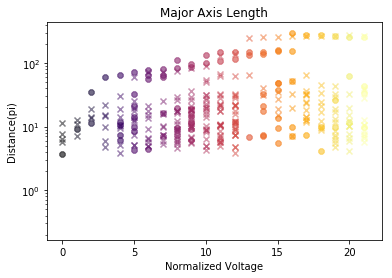

In [412]:
cmap = plt.get_cmap('inferno')
map_ = cmap(np.linspace(0,1,22))

fig = plt.figure()
ax1 = fig.add_subplot(111)
for i, (ag, d_) in enumerate(zip(major_ag,major)):
    for number in ag:
        ax1.scatter(i,number,marker='x',c=map_[i], alpha = 0.5, label="As Grown" +str(i))
    for number in d_:
        ax1.scatter(i,number,marker='8',c=map_[i],alpha = 0.6,label = "Bombarded"+str(i))
ax1.set_yscale('log')
plt.title("Major Axis Length")
plt.xlabel('Normalized Voltage')
plt.ylabel('Distance(pi)')
#plt.legend(("As Grown",90, "Bombarded"), loc='upper left')

#plt.savefig("D:/switching study/nucleation figures/dist_comb" , format="eps", dpi=400)
plt.show()

In [347]:
minor_ag = [None]*len(asgrown)
for i,image in enumerate(asgrown):
    inner_minor = []
    for regions in image:
        inner_minor.append(regions.minor_axis_length)
    minor_ag[i] = inner_minor

In [348]:
minor = [None]*len(doped)
for i,image in enumerate(doped):
    inner_minor = []
    for regions in image:
        inner_minor.append(regions.minor_axis_length)
    minor[i] = inner_minor

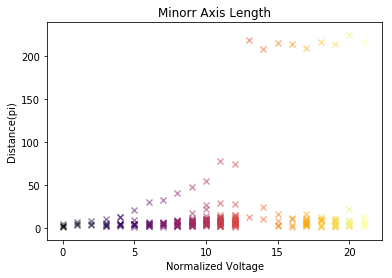

In [355]:
cmap = plt.get_cmap('inferno')
map_ = cmap(np.linspace(0,1,22))

fig = plt.figure()
ax1 = fig.add_subplot(111)
for i, (ag, d_) in enumerate(zip(minor_ag,minor)):
    for number in ag:
        ax1.scatter(i,number,marker='x',c=map_[i], alpha = 0.5, label="As Grown" +str(i))
#    for number in d_:
#        ax1.scatter(i,number,marker='8',c=map_[i],alpha = 0.6,label = "Bombarded"+str(i))
#ax1.set_yscale('log')
plt.title("Minorr Axis Length")
plt.xlabel('Normalized Voltage')
plt.ylabel('Distance(pi)')
#plt.legend(("As Grown",90, "Bombarded"), loc='upper left')

#plt.savefig("D:/switching study/nucleation figures/dist_comb" , format="eps", dpi=400)
plt.show()

In [ ]:
# code that will take the ratio of major and minor axis for each region
for i, (big,small) in enumerate(zip(minor,major)):
    

In [363]:
orient = [None]*len(doped)
for i,image in enumerate(doped):
    inner = []
    for regions in image:
        inner.append(regions.orientation*180/np.pi)
    orient[i] = inner

In [364]:
orient_ag = [None]*len(asgrown)
for i,image in enumerate(asgrown):
    inner = []
    for regions in image:
        inner.append(regions.orientation*180/np.pi)
    orient_ag[i] = inner

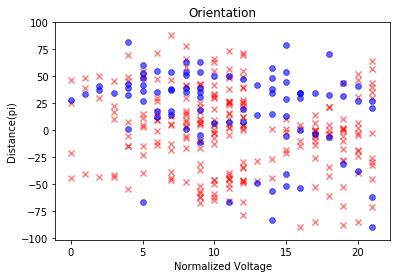

In [413]:
cmap = plt.get_cmap('inferno')
map_ = cmap(np.linspace(0,1,22))

fig = plt.figure()
ax1 = fig.add_subplot(111)
for i, (ag, d_) in enumerate(zip(orient_ag,orient)):
    for number in ag:
        ax1.scatter(i,number,marker='x',c='r', alpha = 0.5, label="As Grown" +str(i))
    for number in d_:
        ax1.scatter(i,number,marker='8',c='b',alpha = 0.6,label = "Bombarded"+str(i))
#ax1.set_yscale('log')
plt.title("Orientation")
plt.xlabel('Normalized Voltage')
plt.ylabel('Distance(pi)')
#plt.legend(("As Grown",90, "Bombarded"), loc='upper left')

#plt.savefig("D:/switching study/nucleation figures/dist_comb" , format="eps", dpi=400)
plt.show()

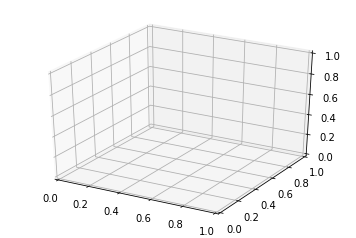

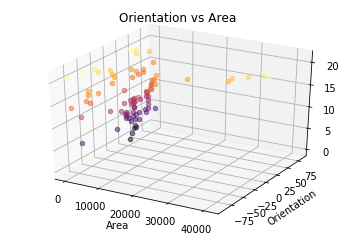

In [377]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax1 = fig.add_subplot(111, projection = '3d')

#for i, (o_ag,a_ag) in enumerate(zip(orient_ag,area_ag)):
#    for number, value in zip(o_ag,a_ag):
#        ax1.scatter(value,number,marker='x',c=map_[i], alpha = 0.5, label="As Grown" +str(i))
for i, (o,a) in enumerate(zip(orient,area)):
    for number, value in zip(o,a):
        ax1.scatter(value,number,i,marker='o',c=map_[i], alpha = 0.5, label="Doped" +str(i))
#ax1.set_xscale('log')
plt.title("Orientation vs Area")
plt.xlabel('Area')
plt.ylabel('Orientation')
#plt.legend(("As Grown",90, "Bombarded"), loc='upper left')

#plt.savefig("D:/switching study/nucleation figures/dist_comb" , format="eps", dpi=400)
plt.show()



In [393]:
moments_ag = [None]*len(asgrown)
for i,image in enumerate(asgrown):
    inner = []
    for regions in image:
        inner.append(regions.moments_central)
    moments_ag[i] = inner

In [394]:
moments = [None]*len(doped)
for i,image in enumerate(doped):
    inner = []
    for regions in image:
        inner.append(regions.moments_central)
    moments[i] = inner

In [398]:
moments[5][1][1]

array([  7.81597009e-13,   1.17984772e+03,   2.70381803e+03,
         5.33918035e+04])

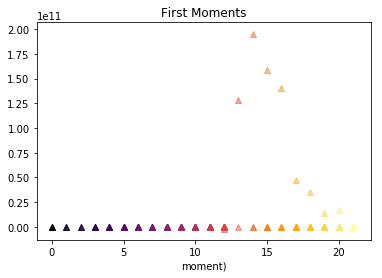

In [402]:
cmap = plt.get_cmap('inferno')
map_ = cmap(np.linspace(0,1,22))

fig = plt.figure()
ax1 = fig.add_subplot(111)
for i, (ag, d_) in enumerate(zip(moments_ag,moments)):
    for number in ag:
        ax1.scatter(i,number[3][1],marker='^',c=map_[i], alpha = 0.5, label="As Grown" +str(i))
#    for number in d_:
#        ax1.scatter(i,number[1],marker='8',c=map_[i],alpha = 0.6,label = "Bombarded"+str(i))
#ax1.set_yscale('log')
plt.title("First Moments")
plt.xlabel('moment)')
#plt.legend(("As Grown",90, "Bombarded"), loc='upper left')

#plt.savefig("D:/switching study/nucleation figures/dist_comb" , format="eps", dpi=400)
plt.show()

In [52]:
ratio_ag = [None]*len(asgrown)
for i,image in enumerate(asgrown):
    inner = []
    for regions in image:
        inner.append(regions.perimeter*20)
    ratio_ag[i] = inner

In [51]:
ratio= [None]*len(doped)
for i,image in enumerate(doped):
    inner = []
    for regions in image:
        inner.append(regions.perimeter*20)
    ratio[i] = inner

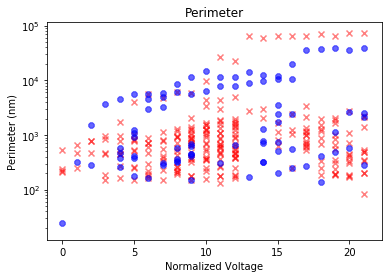

In [55]:
#cmap = plt.get_cmap('inferno')
#map_ = cmap(np.linspace(0,1,22))
#
fig = plt.figure()
ax1 = fig.add_subplot(111)
for i, (ag, d_) in enumerate(zip(ratio_ag,ratio)):
    for number in ag:
        ax1.scatter(i,number,marker='x',c='r', alpha = 0.5, label="As Grown" +str(i))
    for number in d_:
        ax1.scatter(i,number,marker='8',c='b',alpha = 0.6,label = "Bombarded"+str(i))
#ax1.set_yscale('log')
plt.title("Perimeter")
plt.xlabel('Normalized Voltage')
plt.ylabel('Perimeter (nm)')
ax1.set_yscale('log')
#plt.legend(("As Grown",90, "Bombarded"), loc='upper left')

#plt.savefig("D:/switching study/nucleation figures/dist_comb" , format="eps", dpi=400)
plt.show()